# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [24]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/grimoire/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


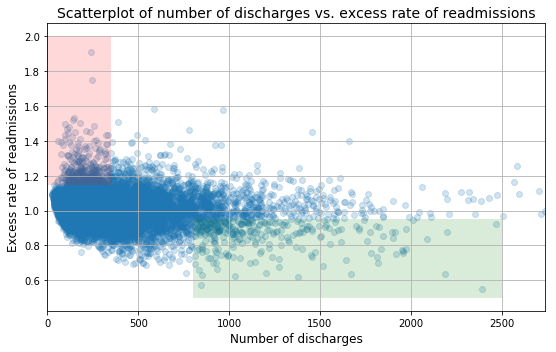

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

I _agree/disagree_ because of:

" Hospitals are stratified into five peer groups, or quintiles, based on the proportion of dual-eligible stays."
https://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html

The hypothesis will be:
* $H_0$ : There isn't a statistically significant correlation between discharges (capacity) and readmissions.
* $H_A$ : There is a statistically significant correlation between discharges (capacity) and readmissions.

In [5]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [6]:
#Removing hospitals with zero discharges
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 0]
df = clean_hospital_read_df.drop('Footnote', 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 11 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 1.1+ MB


In [28]:
# Less than 300 discharges
small_cap = df[df['Number of Discharges'] < 300]
print(np.mean(small_cap['Excess Readmission Ratio']))
# 300-999 discharges
mid_cap = df[(df['Number of Discharges'] >= 300) & (df['Number of Discharges'] < 1000)]
print(np.mean(mid_cap['Excess Readmission Ratio']))
# 1000 or more discharges
large_cap = df[df['Number of Discharges'] >= 1000]
print(np.mean(large_cap['Excess Readmission Ratio']))

1.0142382121807445
1.0018998781725885
0.9783342672413797


In [26]:
# Standard Error
stan_err = np.sqrt((np.std(small_cap['Excess Readmission Ratio'])**2) / len(small_cap['Excess Readmission Ratio']) + (np.std(mid_cap['Excess Readmission Ratio'])**2) / len(mid_cap['Excess Readmission Ratio']))
print(f'{stan_err:.10f}')

moe = 1.96 * stan_err # Margin of Error
print(f'{moe:.10f}')
numerator = np.mean(small_cap['Excess Readmission Ratio']) - np.mean(mid_cap['Excess Readmission Ratio'])
z = numerator / stan_err # Standard Error == denominator
pval = 2 * stats.norm.sf(abs(z))
print('Z score: ', f'{z:.5f}')
print('P-value: ', f'{pval:.7f}')

0.0017609157
0.0034513948
Z score:  7.00677
P-value:  0.0000000


In [27]:
# Standard Error
stan_err = np.sqrt((np.std(mid_cap['Excess Readmission Ratio'])**2) / len(mid_cap['Excess Readmission Ratio']) + (np.std(large_cap['Excess Readmission Ratio'])**2) / len(large_cap['Excess Readmission Ratio']))
print(f'{stan_err:.10f}')

moe = 1.96 * stan_err # Margin of Error
print(f'{moe:.10f}')
numerator = np.mean(mid_cap['Excess Readmission Ratio']) - np.mean(large_cap['Excess Readmission Ratio'])
z = numerator / stan_err # Standard Error == denominator
pval = 2 * stats.norm.sf(abs(z))
print('Z score: ', f'{z:.5f}')
print('P-value: ', f'{pval:.7f}')

0.0057351356
0.0112408657
Z score:  4.10899
P-value:  0.0000397


In [19]:
print(small_cap[small_cap['Excess Readmission Ratio'] > 1].count())
print(small_cap[small_cap['Excess Readmission Ratio'] <= 1].count())
print(small_cap.count())

Hospital Name                 3283
Provider Number               3283
State                         3283
Measure Name                  3283
Number of Discharges          3283
Excess Readmission Ratio      3283
Predicted Readmission Rate    3283
Expected Readmission Rate     3283
Number of Readmissions        3283
Start Date                    3283
End Date                      3283
dtype: int64
Hospital Name                 2825
Provider Number               2825
State                         2825
Measure Name                  2825
Number of Discharges          2825
Excess Readmission Ratio      2825
Predicted Readmission Rate    2825
Expected Readmission Rate     2825
Number of Readmissions        2825
Start Date                    2825
End Date                      2825
dtype: int64
Hospital Name                 6108
Provider Number               6108
State                         6108
Measure Name                  6108
Number of Discharges          6108
Excess Readmission Ratio     

In [20]:
print(mid_cap[mid_cap['Excess Readmission Ratio'] > 1].count())
print(mid_cap[mid_cap['Excess Readmission Ratio'] <= 1].count())
print(mid_cap.count())

Hospital Name                 2450
Provider Number               2450
State                         2450
Measure Name                  2450
Number of Discharges          2450
Excess Readmission Ratio      2450
Predicted Readmission Rate    2450
Expected Readmission Rate     2450
Number of Readmissions        2450
Start Date                    2450
End Date                      2450
dtype: int64
Hospital Name                 2475
Provider Number               2475
State                         2475
Measure Name                  2475
Number of Discharges          2475
Excess Readmission Ratio      2475
Predicted Readmission Rate    2475
Expected Readmission Rate     2475
Number of Readmissions        2475
Start Date                    2475
End Date                      2475
dtype: int64
Hospital Name                 4925
Provider Number               4925
State                         4925
Measure Name                  4925
Number of Discharges          4925
Excess Readmission Ratio     

In [21]:
print(large_cap[large_cap['Excess Readmission Ratio'] > 1].count())
print(large_cap[large_cap['Excess Readmission Ratio'] <= 1].count())
print(large_cap.count())

Hospital Name                 206
Provider Number               206
State                         206
Measure Name                  206
Number of Discharges          206
Excess Readmission Ratio      206
Predicted Readmission Rate    206
Expected Readmission Rate     206
Number of Readmissions        206
Start Date                    206
End Date                      206
dtype: int64
Hospital Name                 258
Provider Number               258
State                         258
Measure Name                  258
Number of Discharges          258
Excess Readmission Ratio      258
Predicted Readmission Rate    258
Expected Readmission Rate     258
Number of Readmissions        258
Start Date                    258
End Date                      258
dtype: int64
Hospital Name                 464
Provider Number               464
State                         464
Measure Name                  464
Number of Discharges          464
Excess Readmission Ratio      464
Predicted Readmission 

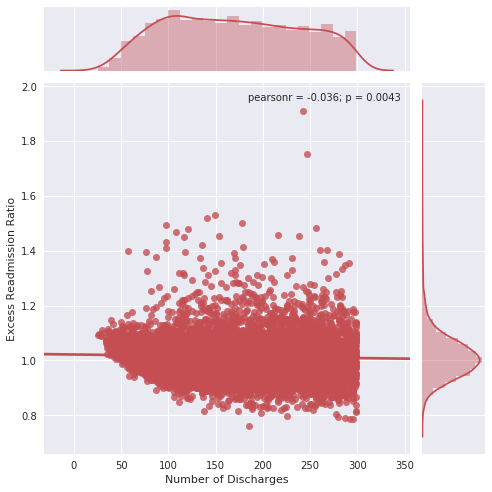

In [8]:
# scatterplot, correlation coefficient, p-value

sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=small_cap,
              kind='reg', color='r', size=7)
plt.show()

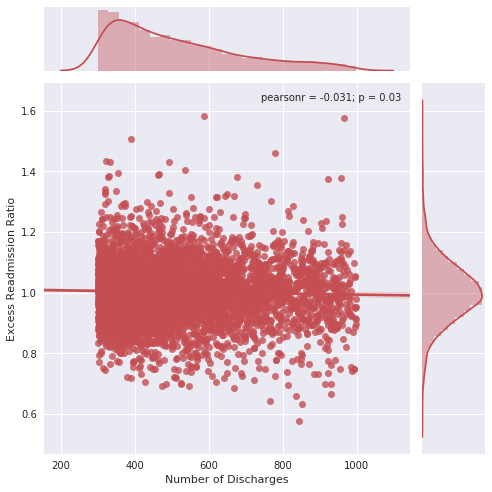

In [9]:
# scatterplot, correlation coefficient, p-value

sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=mid_cap,
              kind='reg', color='r', size=7)
plt.show()

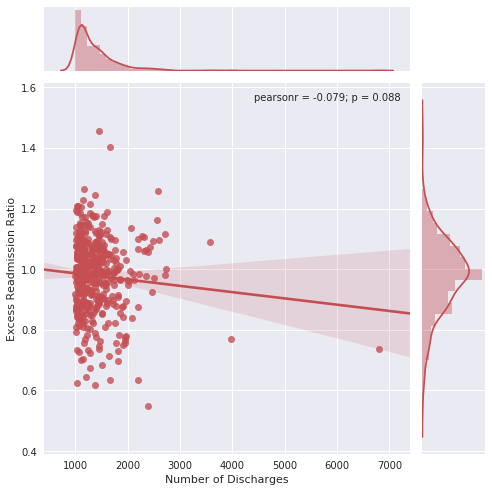

In [10]:
# scatterplot, correlation coefficient, p-value

sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=large_cap,
              kind='reg', color='r', size=7)
plt.show()